In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as sklm
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None);
pd.set_option('display.float_format','{:,.6f}'.format)

## Лабораторные показатели

In [2]:
# path = "smth.xlsx"
# sheets = pd.read_excel(path, sheet_name=None)
# for sheet_name, df in sheets.items():
#     df.to_excel(f"{sheet_name}.xlsx", index=False)

In [3]:
# for sheet_name, df in sheets.items():
#     print(sheet_name)

In [ ]:
df_dairy = pd.read_excel("Dairy indicators.xlsx", header=1, skiprows=[2])

In [5]:
df_dairy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1747 non-null   datetime64[ns]
 1   region                  1747 non-null   object        
 2   prod_farm_name          1747 non-null   object        
 3   farm_type               1747 non-null   object        
 4   farm_name               1747 non-null   object        
 5   cows_total              1747 non-null   object        
 6   milk_cows               1747 non-null   object        
 7   milk_cows_d0            1747 non-null   object        
 8   milk_cows_d1            1747 non-null   object        
 9   milk_cows_d2            1747 non-null   object        
 10  milk_cows_d3            1747 non-null   object        
 11  weekly_milking_per_cow  1747 non-null   object        
 12  gross_milk_yield        1747 non-null   object  

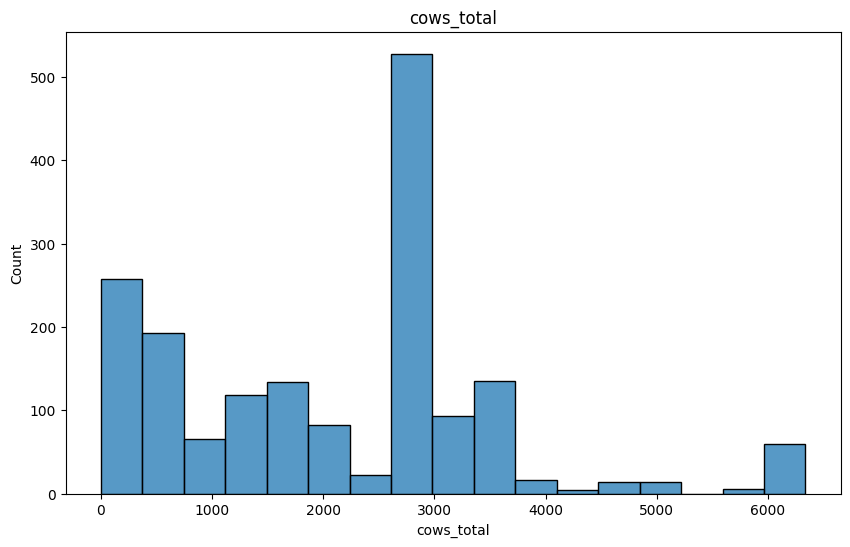

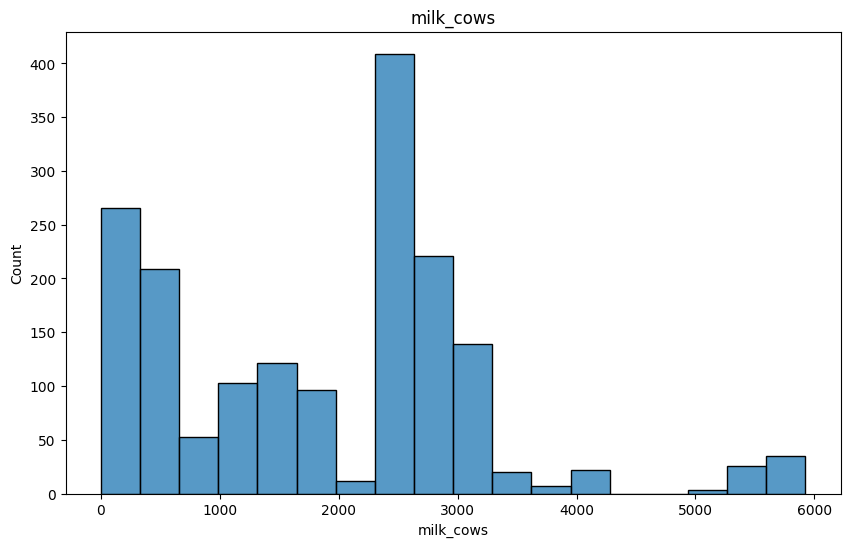

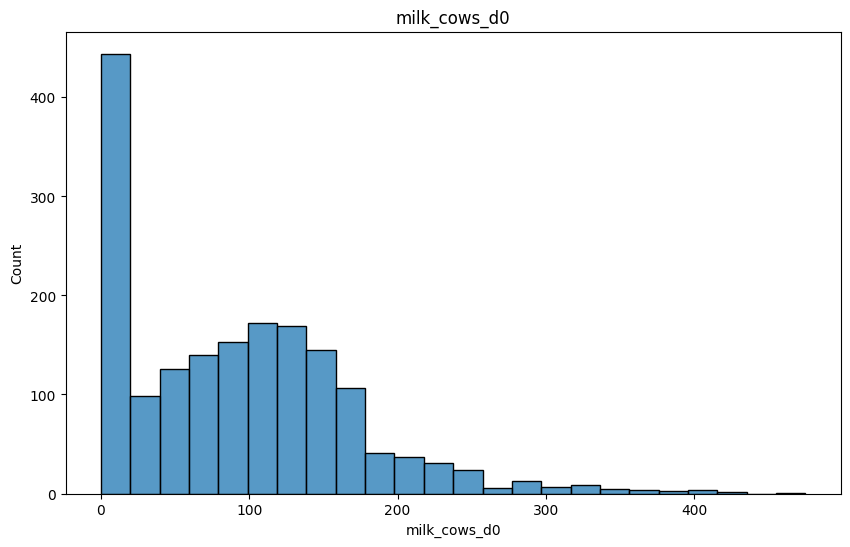

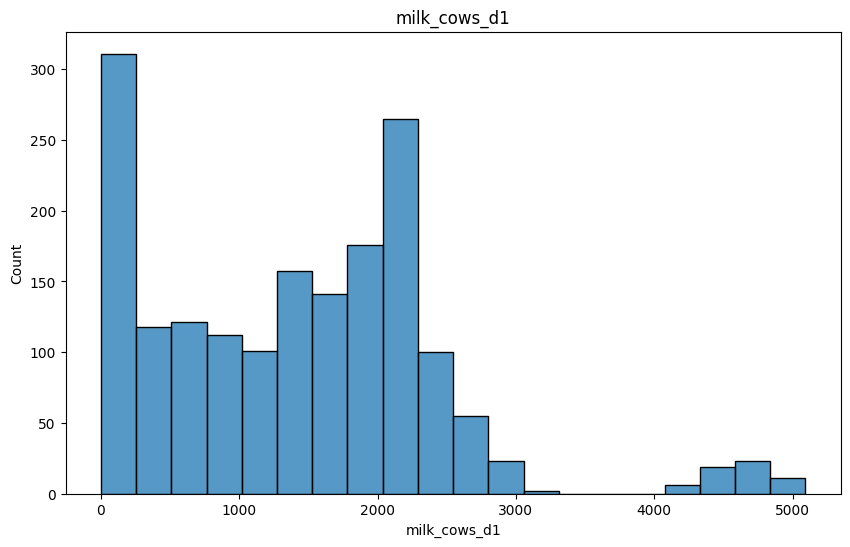

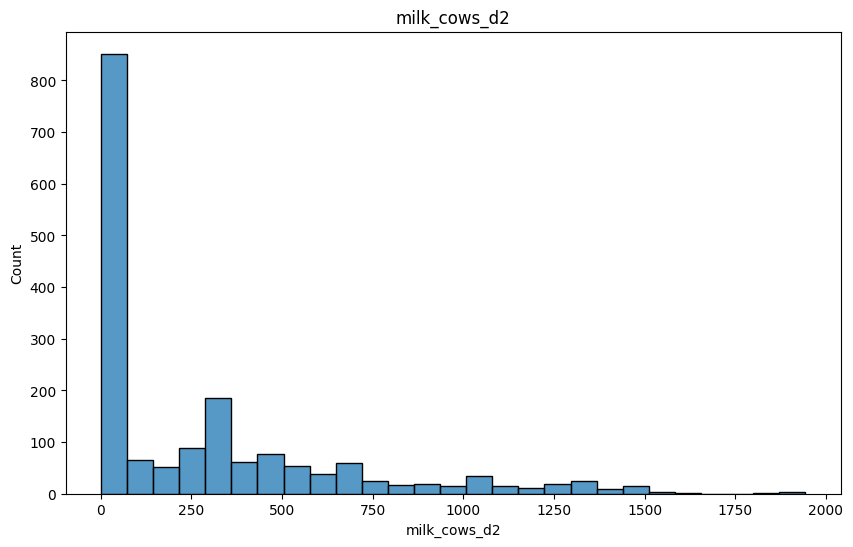

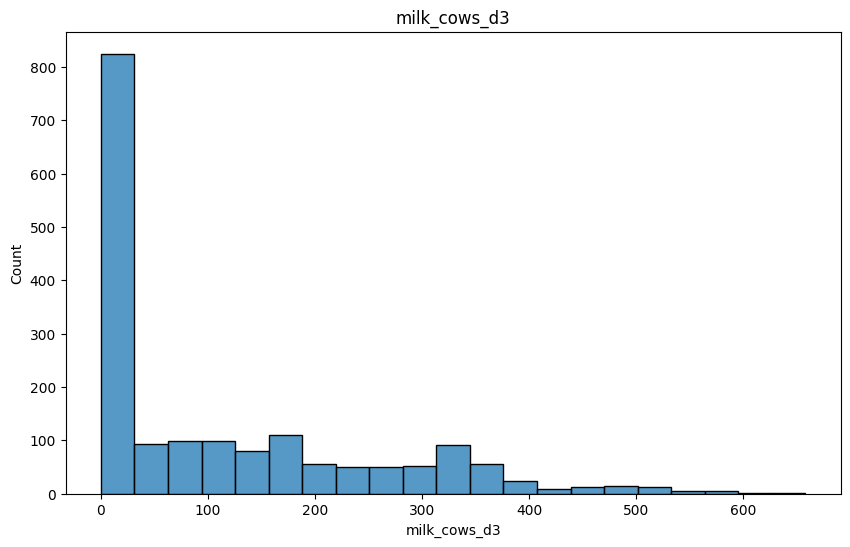

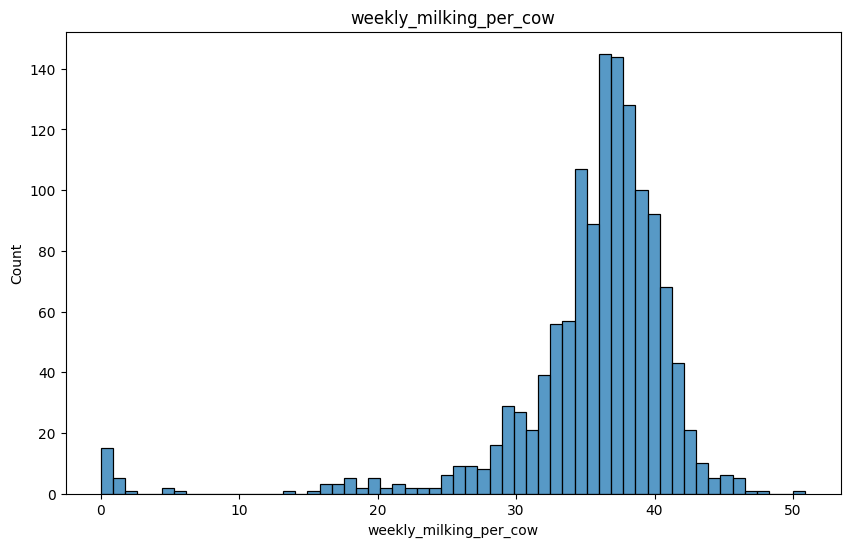

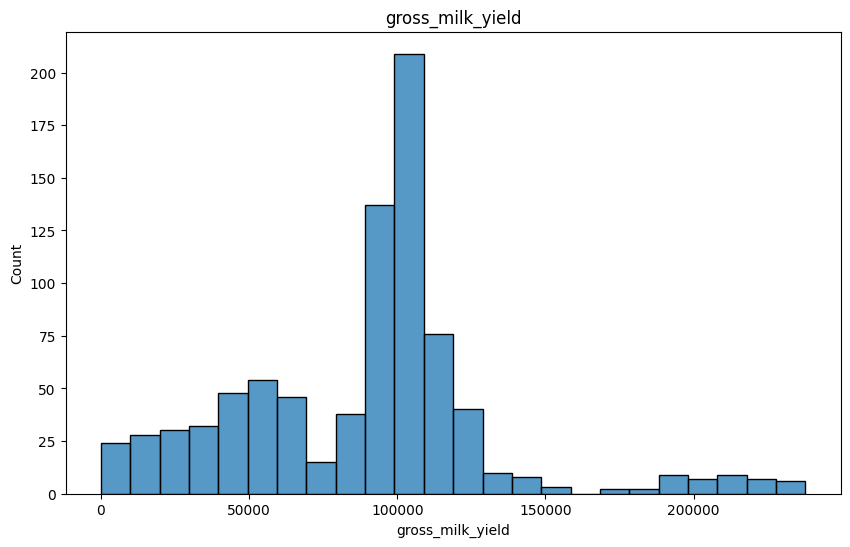

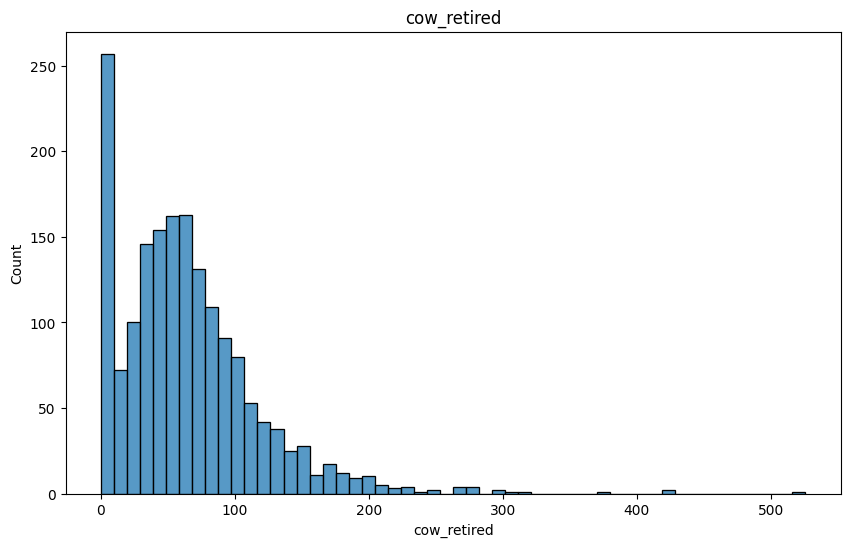

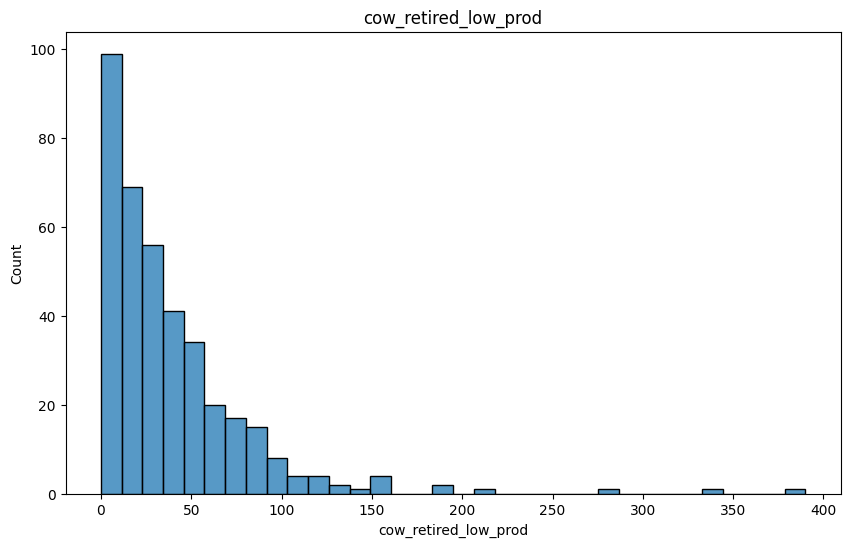

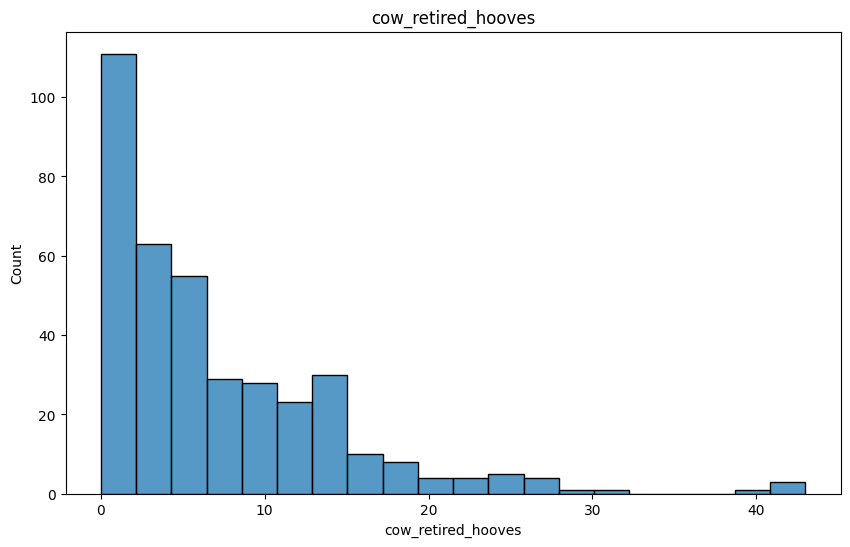

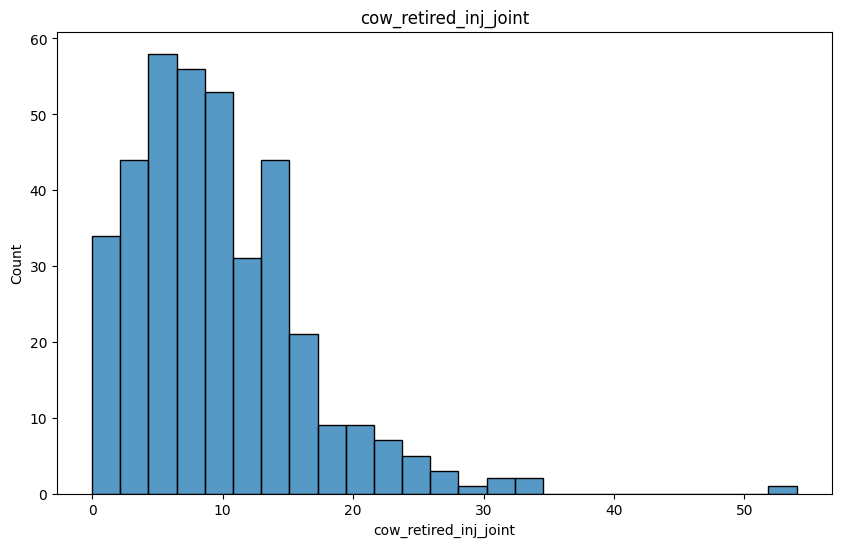

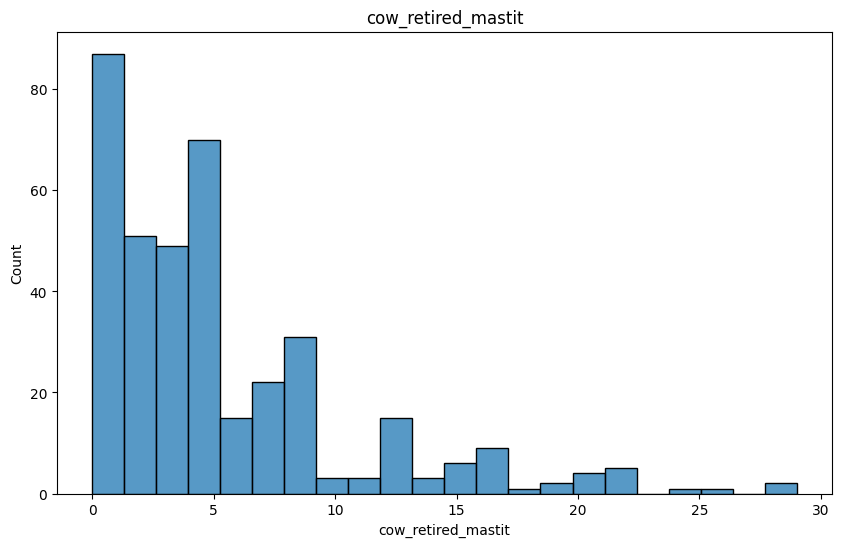

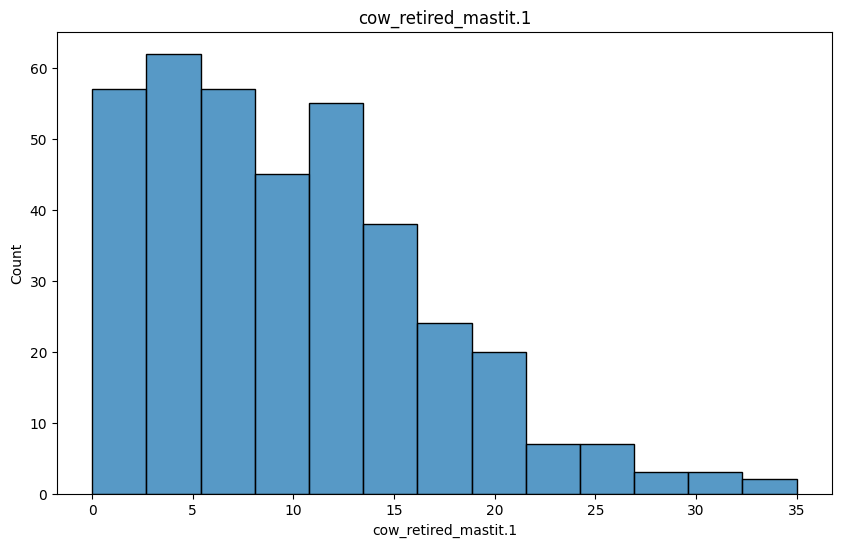

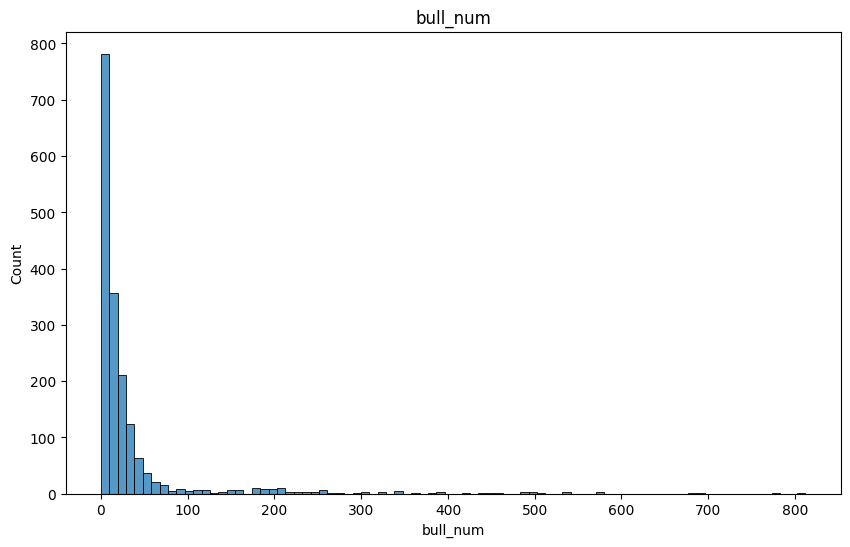

In [6]:
for k in ["cows_total", "milk_cows", "milk_cows_d0", "milk_cows_d1", "milk_cows_d2", "milk_cows_d3", "weekly_milking_per_cow", "gross_milk_yield", "cow_retired", "cow_retired_low_prod", "cow_retired_hooves", "cow_retired_inj_joint", "cow_retired_mastit", "cow_retired_mastit.1", "bull_num"]:
    df_dairy[k] = pd.to_numeric(df_dairy[k], errors='coerce')
    fig = plt.figure(figsize=(10,6))
    plt.title(k)
    sns.histplot(data=df_dairy, x=k)

<Axes: >

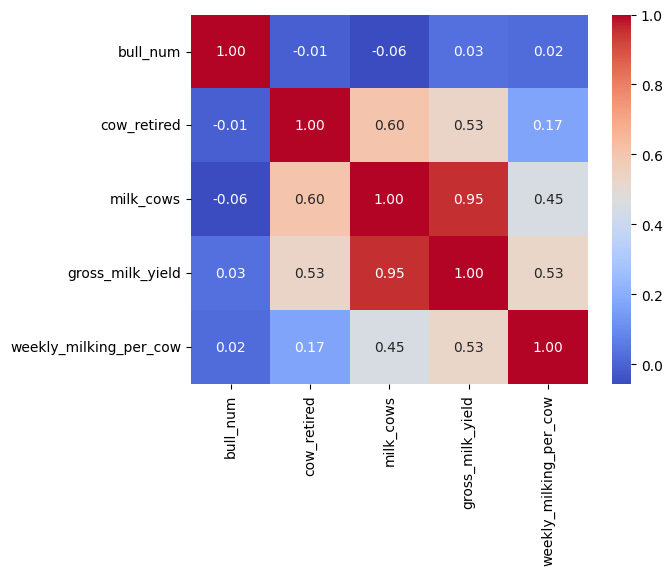

In [7]:
corr = df_dairy[['bull_num', 'cow_retired', 'milk_cows', 'gross_milk_yield', 'weekly_milking_per_cow']].corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")

<Axes: xlabel='gross_milk_yield', ylabel='weekly_milking_per_cow'>

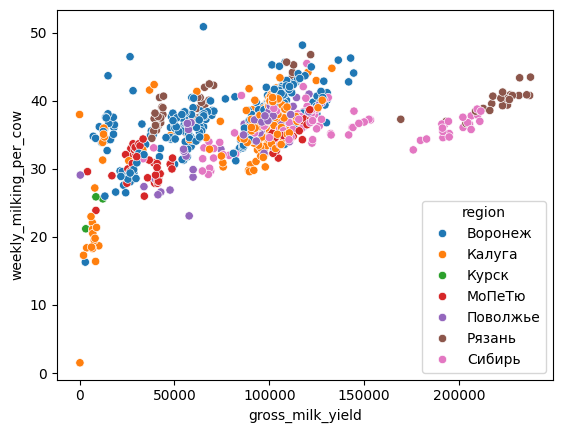

In [8]:
sns.scatterplot(data=df_dairy, x='gross_milk_yield', y='weekly_milking_per_cow', hue='region')

<Axes: xlabel='gross_milk_yield', ylabel='milk_cows'>

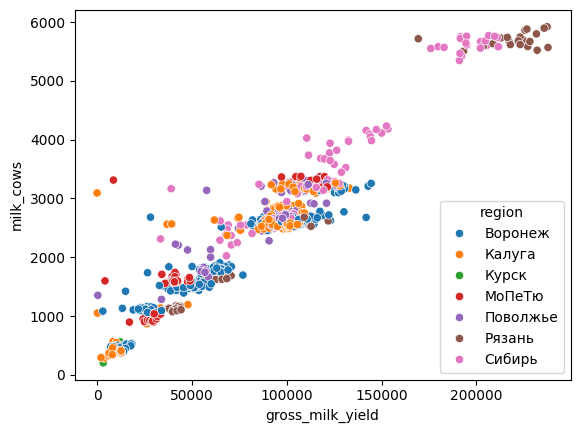

In [9]:
sns.scatterplot(data=df_dairy, x='gross_milk_yield', y='milk_cows', hue='region')

<Axes: xlabel='cow_retired', ylabel='milk_cows'>

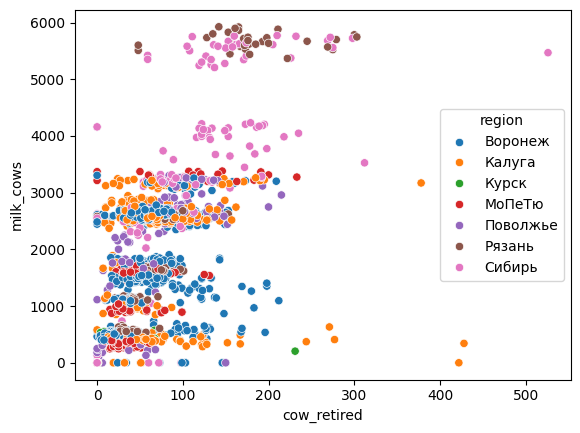

In [10]:
sns.scatterplot(data=df_dairy, x='cow_retired', y='milk_cows', hue='region')

In [11]:
df_feeding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14805 entries, 0 to 14804
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   organisation              14805 non-null  object 
 1   farm_name                 14805 non-null  object 
 2   physiological_group_name  14805 non-null  object 
 3   feed_name                 14805 non-null  object 
 4   2022-01-01 00:00:00       4281 non-null   float64
 5   2022-02-01 00:00:00       4218 non-null   float64
 6   2022-03-01 00:00:00       4206 non-null   float64
 7   2022-04-01 00:00:00       4264 non-null   float64
 8   2022-05-01 00:00:00       4316 non-null   float64
 9   2022-06-01 00:00:00       4256 non-null   float64
 10  2022-07-01 00:00:00       4185 non-null   float64
 11  2022-08-01 00:00:00       4509 non-null   float64
 12  2022-09-01 00:00:00       4594 non-null   float64
 13  2022-10-01 00:00:00       4579 non-null   float64
 14  2022-1

In [12]:
df_feeding.physiological_group_name.nunique()

38

In [13]:
df_herd = pd.read_excel("Herd maintenance.xlsx", header=1, skiprows=[2])

In [14]:
df_herd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     4301 non-null   datetime64[ns]
 1   region                   4301 non-null   object        
 2   prod_farm_name           4301 non-null   object        
 3   farm_type                4301 non-null   object        
 4   farm_name                4301 non-null   object        
 5   ls_capacity              4301 non-null   object        
 6   ls_occupancy             4301 non-null   object        
 7   forage_cow               4301 non-null   object        
 8   milk_cow                 4301 non-null   object        
 9   dry_cow                  4301 non-null   object        
 10  milk_marketab_prc        4301 non-null   object        
 11  forcow_milk_yeild        4301 non-null   object        
 12  forcow_milk_yeild_stand  4301 non-

In [16]:
df_herd.head()

,date,region,prod_farm_name,farm_type,farm_name,ls_capacity,ls_occupancy,forage_cow,milk_cow,dry_cow,milk_marketab_prc,forcow_milk_yeild,forcow_milk_yeild_stand,milk_fat,milk_protein,somatic_cells,bac_contam,cow_retired,cow_lame,cow_mastits,calves,cow_metrit,ph_urine_avr
0,2020-01-01,Воронеж,ЭНА Восток,ЖК,ЖК Бобров,2800,95.535714,2675,2329,346,94,-,-,-,-,92,41,52,90,57,-,-,-
1,2020-01-01,Воронеж,ЭНА Восток,ЖК,ЖК Бобров-2,2800,101.678571,2847,2378,469,96,-,-,-,-,90,29,30,44,27,-,-,-
2,2020-01-01,Воронеж,ЭНА Восток,ЖК,ЖК Верхний Икорец,2800,101.071429,2830,2363,467,96,-,-,-,-,161,72,52,57,77,-,-,-
3,2020-01-01,Воронеж,ЭНА Восток,ЖК,ЖК Петропавловка,2800,59.321429,1661,1632,29,99,-,-,-,-,69,8,35,120,26,-,-,-
4,2020-01-01,Воронеж,ЭНА Восток,МТФ,МТФ Владимировка,467,37.473233,175,175,0,96,-,-,-,-,259,58,17,2,10,-,-,-


In [17]:
df_herd[df_herd['ls_capacity'] == '-'].count()

date                       686
region                     686
prod_farm_name             686
farm_type                  686
farm_name                  686
ls_capacity                686
ls_occupancy               686
forage_cow                 686
milk_cow                   686
dry_cow                    686
milk_marketab_prc          686
forcow_milk_yeild          686
forcow_milk_yeild_stand    686
milk_fat                   686
milk_protein               686
somatic_cells              686
bac_contam                 686
cow_retired                686
cow_lame                   686
cow_mastits                686
calves                     686
cow_metrit                 686
ph_urine_avr               686
dtype: int64

In [18]:
df_herd[(df_herd['ls_capacity'] == '-') & (df_herd['milk_cow'] == '-')].count()

date                       662
region                     662
prod_farm_name             662
farm_type                  662
farm_name                  662
ls_capacity                662
ls_occupancy               662
forage_cow                 662
milk_cow                   662
dry_cow                    662
milk_marketab_prc          662
forcow_milk_yeild          662
forcow_milk_yeild_stand    662
milk_fat                   662
milk_protein               662
somatic_cells              662
bac_contam                 662
cow_retired                662
cow_lame                   662
cow_mastits                662
calves                     662
cow_metrit                 662
ph_urine_avr               662
dtype: int64

In [19]:
df_herd['ls_capacity'].isna().sum()

np.int64(0)

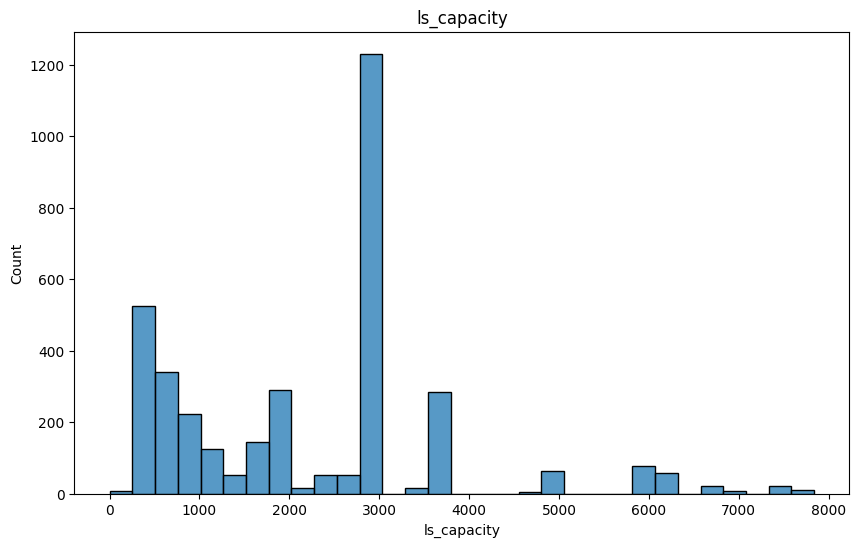

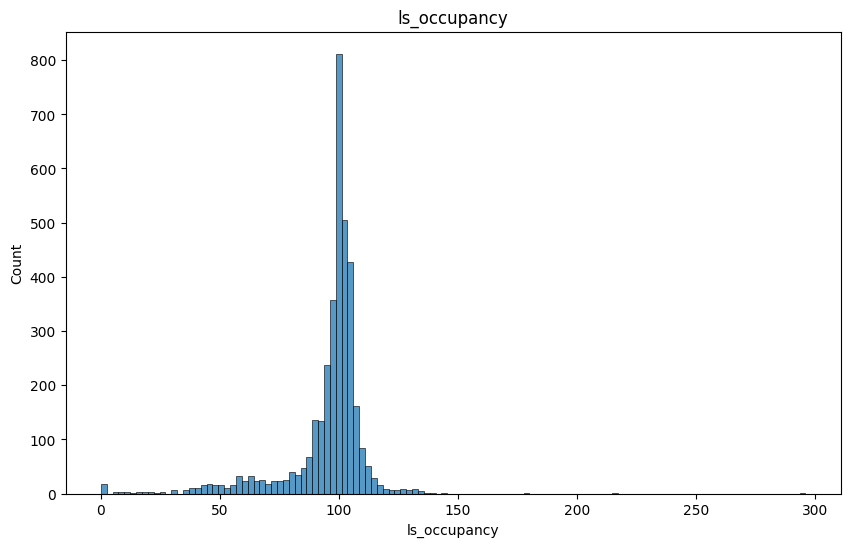

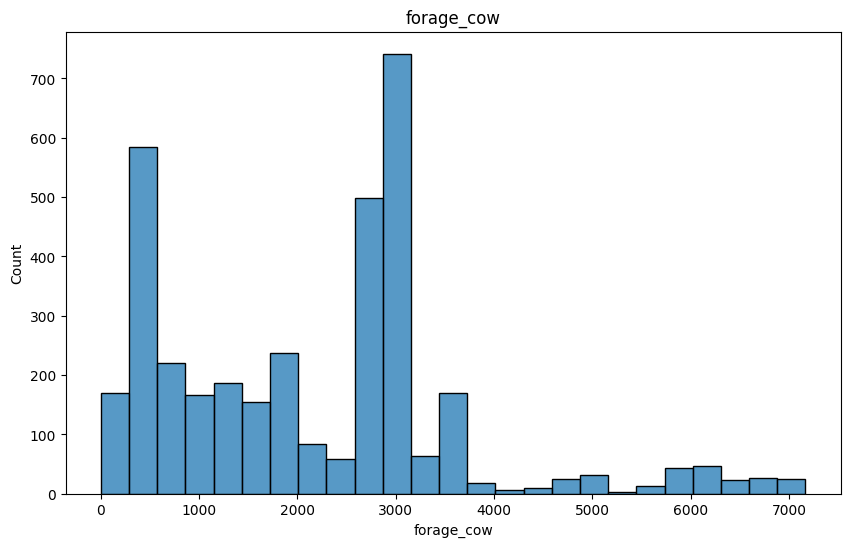

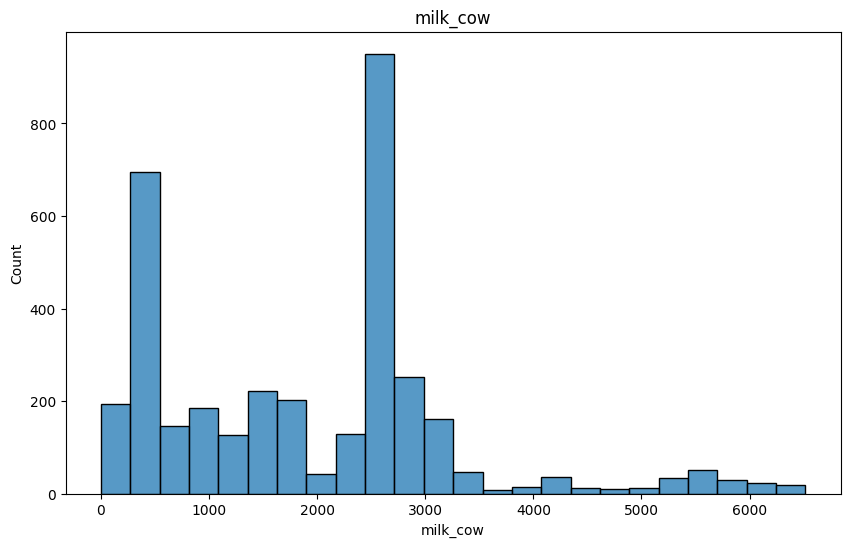

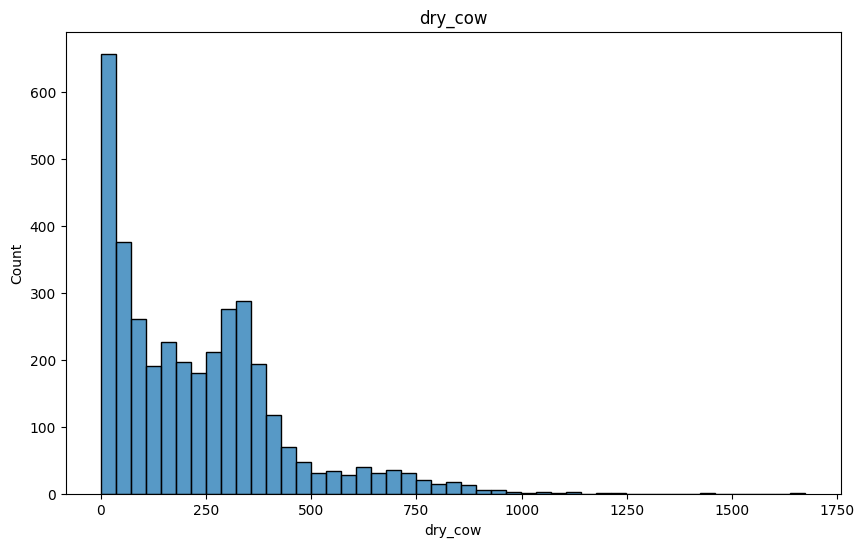

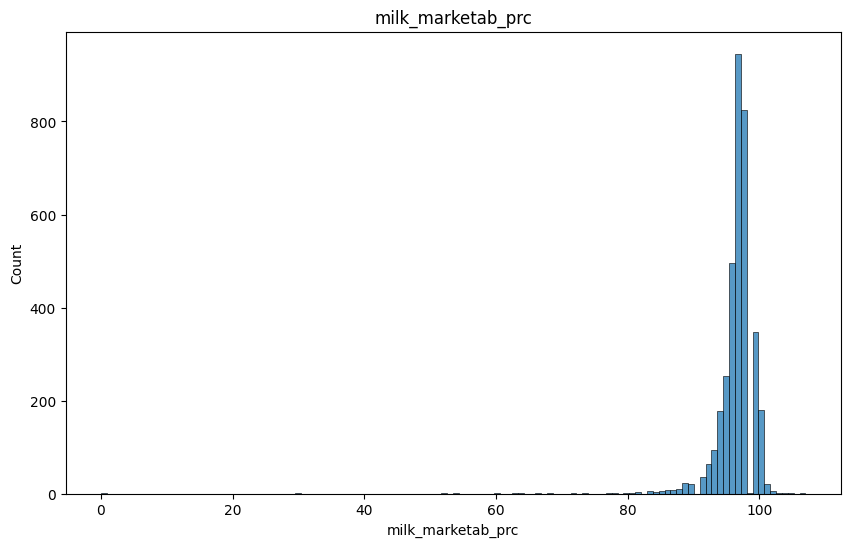

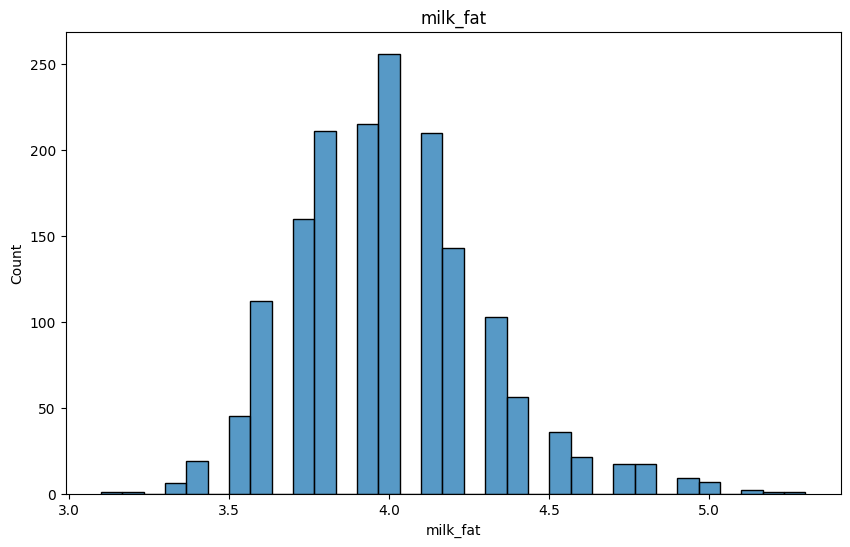

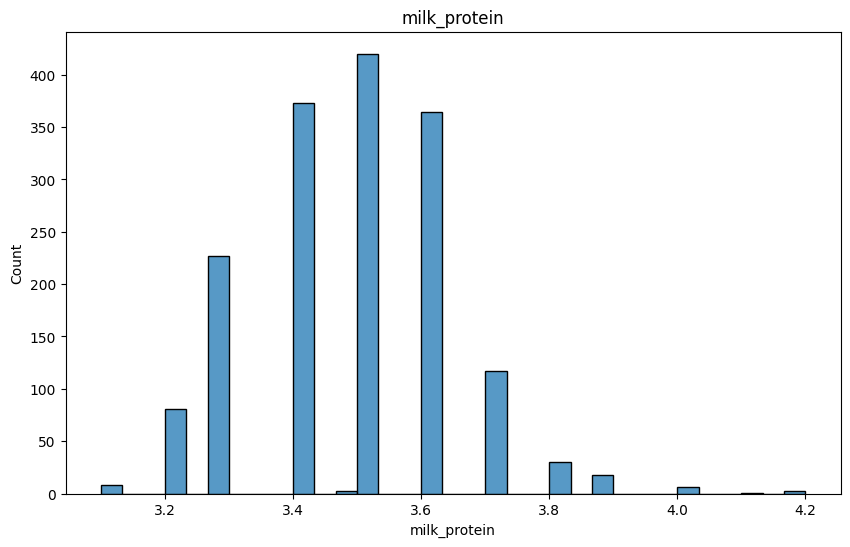

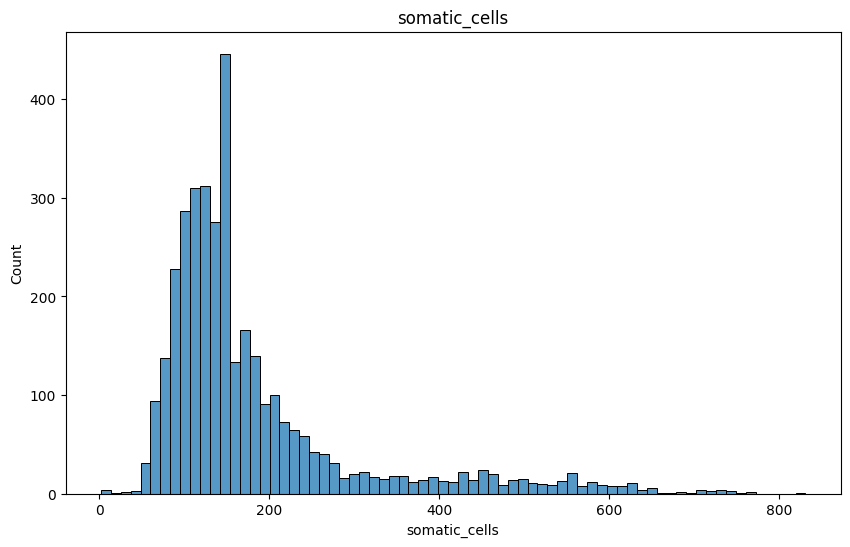

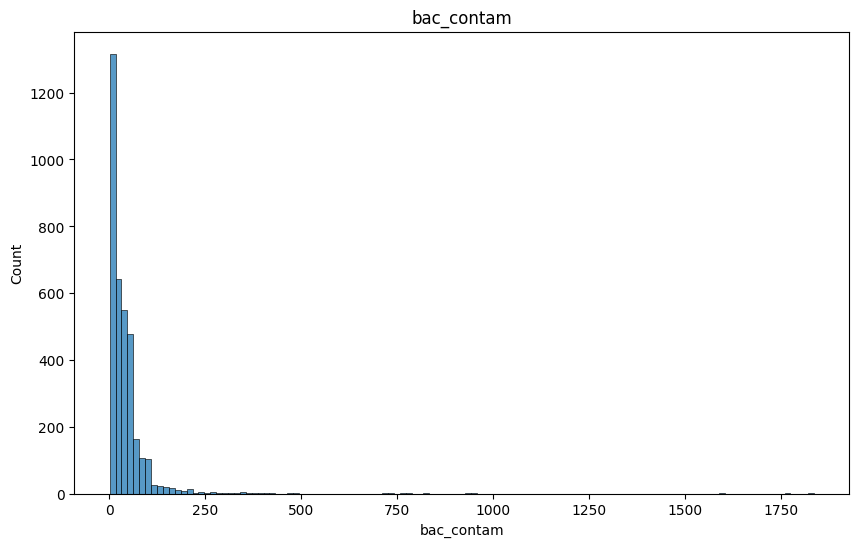

In [20]:
for k in ['ls_capacity', 'ls_occupancy', 'forage_cow', 'milk_cow', 'dry_cow', 'milk_marketab_prc', 'milk_fat', 'milk_protein', 'somatic_cells', 'bac_contam']:
    fig = plt.figure(figsize=(10,6))
    df_herd[k] = pd.to_numeric(df_herd[k], errors='coerce')
    plt.title(k)
    sns.histplot(data=df_herd, x=k)

<Axes: xlabel='ph_urine_avr', ylabel='bac_contam'>

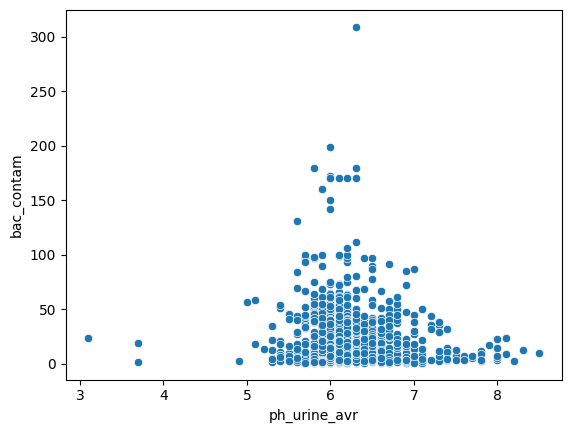

In [21]:
df_herd['ph_urine_avr'] = pd.to_numeric(df_herd['ph_urine_avr'], errors='coerce')
df_herd['cow_retired'] = pd.to_numeric(df_herd['cow_retired'], errors='coerce')
sns.scatterplot(data=df_herd, x='ph_urine_avr', y='bac_contam')

<Axes: xlabel='cow_retired', ylabel='bac_contam'>

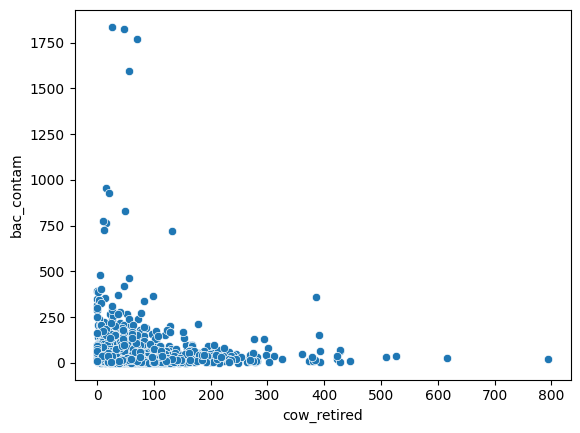

In [22]:
sns.scatterplot(data=df_herd, x='cow_retired', y='bac_contam')

In [23]:
from scipy.stats import pearsonr
df_herd['cow_mastits'] = pd.to_numeric(df_herd['cow_mastits'], errors='coerce')
temp = df_herd.dropna(subset=['cow_mastits', 'bac_contam'])
pearsonr(temp['cow_mastits'], temp['bac_contam'])

PearsonRResult(statistic=np.float64(-0.07801518411067929), pvalue=np.float64(4.453366945348041e-06))

In [24]:
temp = df_herd.dropna(subset=['ph_urine_avr', 'bac_contam'])
pearsonr(temp['ph_urine_avr'], temp['bac_contam'])

PearsonRResult(statistic=np.float64(-0.045656986188653936), pvalue=np.float64(0.13142542871787583))

In [25]:
df_herd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     4301 non-null   datetime64[ns]
 1   region                   4301 non-null   object        
 2   prod_farm_name           4301 non-null   object        
 3   farm_type                4301 non-null   object        
 4   farm_name                4301 non-null   object        
 5   ls_capacity              3615 non-null   float64       
 6   ls_occupancy             3579 non-null   float64       
 7   forage_cow               3603 non-null   float64       
 8   milk_cow                 3603 non-null   float64       
 9   dry_cow                  3603 non-null   float64       
 10  milk_marketab_prc        3546 non-null   float64       
 11  forcow_milk_yeild        4301 non-null   object        
 12  forcow_milk_yeild_stand  4301 non-

<Axes: >

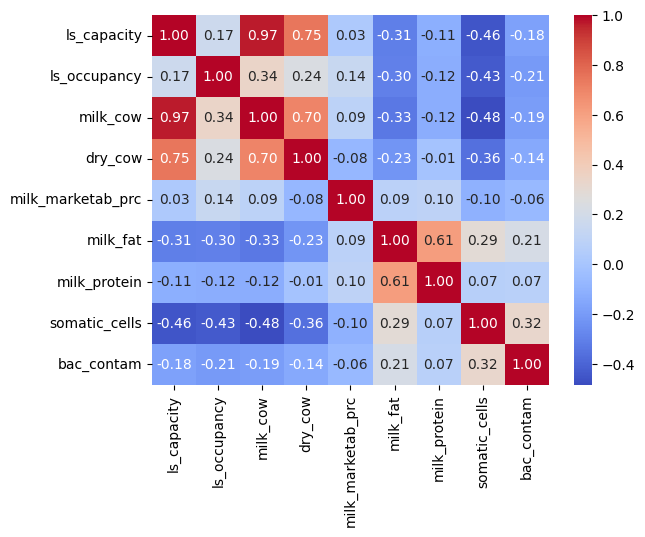

In [26]:
corr = df_herd[['ls_capacity', 'ls_occupancy', 'milk_cow', 'dry_cow', 'milk_marketab_prc', 'milk_fat', 'milk_protein', 'somatic_cells', 'bac_contam']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

<Axes: xlabel='milk_protein', ylabel='milk_fat'>

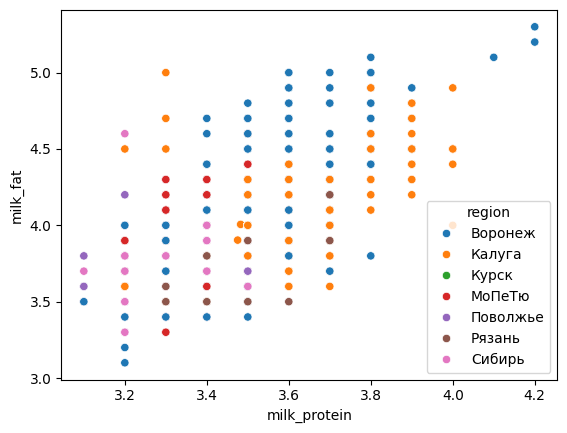

In [46]:
df_herd['milk_protein'] = pd.to_numeric(df_herd['milk_protein'], errors='coerce')
df_herd['milk_fat'] = pd.to_numeric(df_herd['milk_fat'], errors='coerce')
sns.scatterplot(data=df_herd, x='milk_protein', y='milk_fat', hue='region')

In [27]:
df_herd.milk_marketab_prc.describe()

count   3,546.000000
mean       96.557146
std         3.568314
min         0.000000
25%        96.000000
50%        97.000000
75%        98.000000
max       107.000000
Name: milk_marketab_prc, dtype: float64

In [28]:
df_herd = pd.read_excel("Herd maintenance.xlsx", header=1, skiprows=[2])

In [29]:
mask = df_herd.select_dtypes(include=['object']).apply(
    lambda col: col.astype(str) == '-'
).any(axis=1)
cnt = mask.sum()
cnt

np.int64(3222)

In [30]:
df_herd.shape

(4301, 23)

In [31]:
cnt / df_herd.shape[0] * 100
#Вот столько у нас колонок с пропусками

np.float64(74.91281097419204)

In [32]:
df_herd.farm_name.nunique()

80

In [ ]:
whole_empty_by_farm = df_herd.groupby("farm_name").apply(
    lambda x: (x.astype(str) == '-').any(axis=1).sum()
)
total_by_farm = df_herd.groupby('farm_name').size()
whole_percent_by_farm = round((whole_empty_by_farm / total_by_farm * 100), 2)
whole_percent_by_farm

In [ ]:
cols = ['ls_capacity', 'ls_occupancy', 'forage_cow', 'milk_cow', 'dry_cow', 'forcow_milk_yeild', 'forcow_milk_yeild_stand', 'milk_marketab_prc', 'milk_fat', 'milk_protein', 'bac_contam', 'cow_retired', 'cow_lame']
empty_by_farm = df_herd.groupby("farm_name").apply(
    lambda x: (x[cols].astype(str) == '-').any(axis=1).sum()
)
total_by_farm = df_herd.groupby('farm_name').size()
percent_by_farm = round((whole_empty_by_farm / total_by_farm * 100), 2)
percent_by_farm

In [44]:
whole_percent = round((whole_empty_by_farm.sum() / total_by_farm.sum() * 100), 2)
whole_percent

np.float64(74.91)

In [48]:
df_herd.date.describe()

count                             4301
mean     2022-10-01 23:31:32.490118400
min                2020-01-01 00:00:00
25%                2021-05-01 00:00:00
50%                2022-10-01 00:00:00
75%                2024-03-01 00:00:00
max                2025-07-01 00:00:00
Name: date, dtype: object